<a href="https://colab.research.google.com/github/nmluthfi/TSP_with_SA_and_PSO/blob/Simulated-Annealing/TSP_with_Simulated_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulated Annealing algorithm
*   Nama: Nur Muhammad Luthfi
*   NIM: 1301218676



Best Path:  [1, 2, 4, 3, 0, 1]
Best Cost:  23.620877889751565


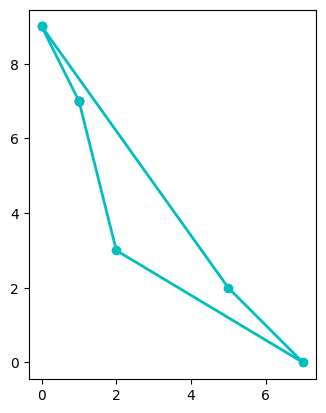

In [ ]:
import math
import random
import matplotlib.pyplot as plt

def distance(city1, city2):
    """Returns the Euclidean distance between two cities."""
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

def cost(solution, cities):
    """Returns the total distance traveled for a given solution."""
    total = 0
    for i in range(len(solution)):
        j = (i + 1) % len(solution)
        city1, city2 = cities[solution[i]], cities[solution[j]]
        total += distance(city1, city2)
    return total

def neighbor(solution):
    """Returns a neighboring solution by swapping two random cities."""
    i, j = random.sample(range(len(solution)), 2)
    new_solution = solution[:]
    new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
    return new_solution

def acceptance_probability(old_cost, new_cost, temperature):
    """Returns the probability of accepting a worse solution."""
    if new_cost < old_cost:
        return 1.0
    else:
        return math.exp((old_cost - new_cost) / temperature)

def anneal(cities, initial_temperature=10000, cooling_factor=0.99):
    """Uses simulated annealing to solve the traveling salesman problem."""
    solution = list(range(len(cities)))
    random.shuffle(solution)
    best_solution = solution
    temperature = initial_temperature
    while temperature > 1:
        new_solution = neighbor(solution)
        old_cost = cost(solution + [solution[0]], cities)  # Ensure solution returns to origin city
        new_cost = cost(new_solution + [new_solution[0]], cities)  # Ensure new solution returns to origin city
        ap = acceptance_probability(old_cost, new_cost, temperature)
        if random.random() < ap:
            solution = new_solution
        if cost(solution + [solution[0]], cities) < cost(best_solution + [best_solution[0]], cities):
            best_solution = solution
        temperature *= cooling_factor
    return best_solution

def plot_tsp(path, cities):
    """
    Plot the TSP path using matplotlib.
    
    Args:
    - path: a list of city indices representing the TSP path
    - cities: a list of tuples representing the (x, y) coordinates of each city
    """
    x = [city[0] for city in cities]
    y = [city[1] for city in cities]
    path_x = [x[i] for i in path]
    path_y = [y[i] for i in path]
    plt.plot(path_x, path_y, 'co-', lw=2)
    plt.plot(path_x[0], path_y[0], 'ro')
    plt.plot([path_x[-1], path_x[0]], [path_y[-1], path_y[0]], 'co-', lw=2)
    plt.axis('scaled')
    plt.axis('on')
    plt.show()

# Example usage:
cities = [(0, 9), (1, 7), (2, 3), (5, 2), (7, 0)]
solution = anneal(cities)
print('Best Path: ', solution + [solution[0]])
print('Best Cost: ', cost(solution + [solution[0]], cities))

# Call the anneal function to generate the TSP path
path = anneal(cities)

# Visualize the TSP path using the plot_tsp function
plot_tsp(path, cities)